<a href="https://colab.research.google.com/github/Midnight29x/Multispectral-Images/blob/main/CEP_ImageLoad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [8]:
coastal = gdal.Open("/content/LC08_L1TP_150037_20211225_20211230_01_T1_B1.TIF")
blue = gdal.Open("/content/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF")
green = gdal.Open("/content/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF")
red = gdal.Open("")

c = coastal.GetRasterBand(1).ReadAsArray()

AttributeError: ignored

In [9]:

plt.figure()
plt.imshow(c)
plt.show()


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
coastal.ReadAsArray().shape

Combining the three bands

In [ ]:
'''
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_BQA.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_ANG.txt
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B11.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B10.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B9.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B8.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B7.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B6.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B5.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B1.TIF
/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_MTL.txt
'''

Reading the second band here that is blue band

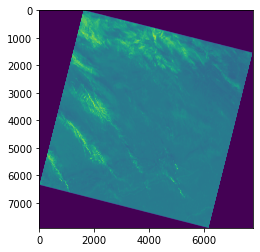

In [10]:
blue = gdal.Open("/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF")

b = blue.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(b)
plt.show()


In [11]:
blue.ReadAsArray().shape

(7911, 7781)

In [12]:
pip install rasterio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Stack Multi Band Imagery
Some remote sensing datasets are stored with each band in a separate file. However, often you want to use all of the bands together in your analysis. For example you need all of the bands together in the same file or “stack” in order to plot a color RGB image. EarthPy has a stack() function that allows you to take a set of .tif files that are all in the same spatial extent, CRS and resolution and either export them together a single stacked .tif file or work with them in Python directly as a stacked numpy array.

To begin using the EarthPy stack() function, import the needed packages and create an array to be plotted. Below you plot the data as continuous with a colorbar using the plot_bands() function.

We will use es.stack() function of earthpy library to create a raster stack of multi-band raster. It need three steps:


1.  Create a raster list using glob() function
2.  Create a path and define a name for mutli-band raster.
3.  Apply es.stack() to creat new stacked raster with all bands save as multi tif.
4.  Then apply rio.open to read the raster bands


Creat a Raster List
You will use the glob function see the files in landsat data directory


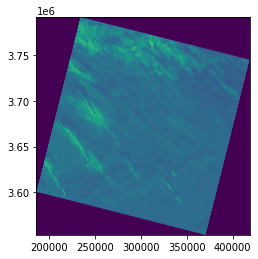

In [13]:
import rasterio
from rasterio.plot import show
green = r'/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF'
img_g= rasterio.open(green)
show(img_g)


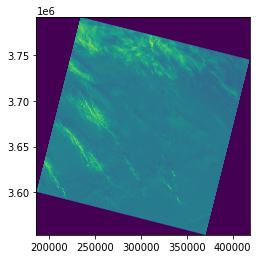

In [14]:

blue = r'/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF'
img_b = rasterio.open(blue)
show(img_b)


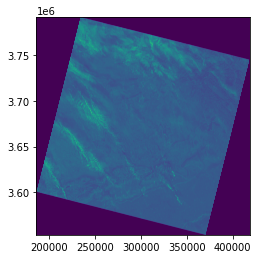

In [15]:

red = r'/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF'
img_r = rasterio.open(red)
show(img_r)


In [16]:

import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot


In [17]:
b2= "/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF"
b3="/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF"
b4="/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF"
b5="/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B5.TIF"

b2_r=rio.open(b2)
b3_r=rio.open(b3)
b4_r=rio.open(b4)
b5_r=rio.open(b5)

Text(0.5, 1.0, 'Band-5')

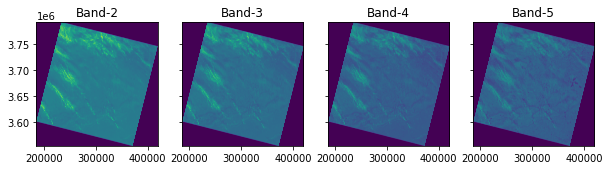

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot 4 bands
show(b2_r, ax=ax1)
show(b3_r, ax=ax2)
show(b4_r, ax=ax3)
show(b5_r, ax=ax4)

# Add titles
ax1.set_title("Band-2")
ax2.set_title("Band-3")
ax3.set_title("Band-4")
ax4.set_title("Band-5")

In [19]:
from glob import glob


In [20]:
glob ("/content/drive/MyDrive/CEP/*")


['/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B1.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B5.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B6.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B7.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B8.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B9.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B10.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B11.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_BQA.TIF',
 '/content/drive/MyDrive/CEP/landsat_multi.tif']

Now we will create a list for band (2,3,4 and 5)



In [21]:
multi_bands=glob( "/content/drive/MyDrive/CEP/*B[2:3:4:5]*.TIF")
multi_bands

['/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF',
 '/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B5.TIF']

In [22]:
pip install earthpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:

import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

Now you have a list of all of the landsat bands in your landsat collections folder. You could chose to open each file individually using the rio.open (rasterio library) function.

Remember that Python uses 0 based indexing so band 3 is actually at index [2] not [3]

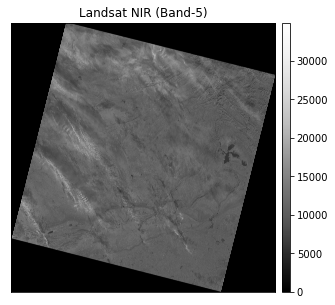

In [24]:
with rio.open(multi_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat NIR (Band-5)",
              scale=False, 
              figsize=(5, 6))
plt.show()

Create a path of mutli-band raster¶


In [25]:
landsat_multi_path = "/content/drive/MyDrive/CEP/landsat_multi.tif"


**Create stacked raster with all bands save as landsat_multi.tif**


In [26]:
land_stack, land_meta = es.stack(multi_bands,landsat_multi_path)

###Open multi-band raster
Once we have stacked 4 bands, we can import it and work with it as we need to!



In [27]:
with rio.open(landsat_multi_path) as src:
    landsat_multi = src.read() 

**Plot all bands using earthpy**


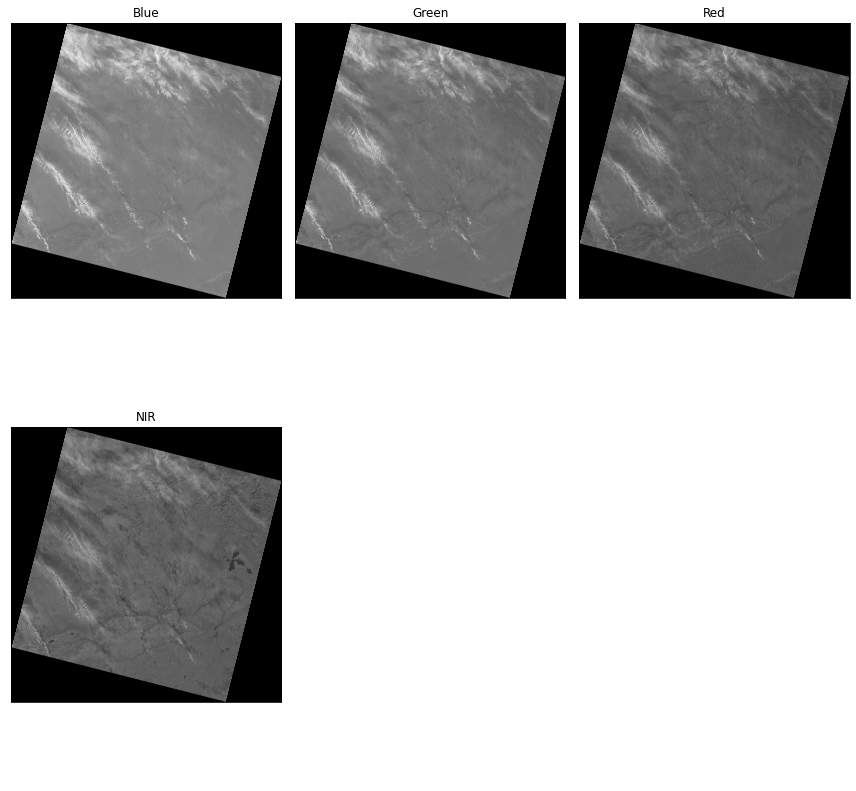

In [28]:
band_titles = ["Blue", "Green", "Red", "NIR"]
ep.plot_bands(landsat_multi,
              title=band_titles, cbar=False)
plt.show()

**RGB Image**


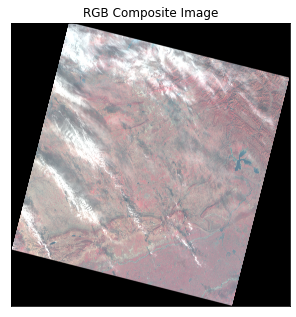

In [29]:
ep.plot_rgb(landsat_multi,
            rgb=[3, 2, 1],
            stretch=True,
            figsize=(5, 6),
            title="RGB Composite Image")
plt.show()

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Performing PCA

In [31]:
landsat_multi.shape

(4, 7911, 7781)

In [32]:
blue= gdal.Open("/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B2.TIF")
green= gdal.Open("/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B3.TIF")
red= gdal.Open("/content/drive/MyDrive/CEP/LC08_L1TP_150037_20211225_20211230_01_T1_B4.TIF")


In [33]:
b, g, r = blue.ReadAsArray().shape, green.ReadAsArray().shape, red.ReadAsArray().shape

In [34]:
b,g,r

((7911, 7781), (7911, 7781), (7911, 7781))

In [36]:
r/255

TypeError: ignored

In [37]:
img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/CEP/landsat_multi.tif"),cv2.COLOR_BGR2RGB)

In [38]:
img.shape

(7911, 7781, 3)

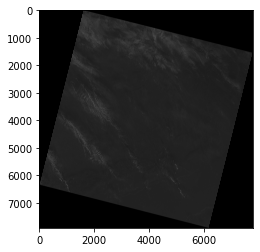

In [39]:
plt.imshow(img)

In [40]:
r, g, b = cv2.split(img)

In [41]:
r,g,b =r/255,g/255,b/255

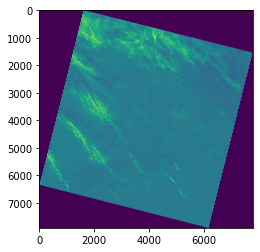

In [42]:
plt.imshow(r)

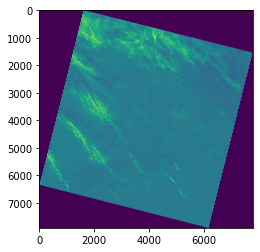

In [43]:
plt.imshow(g)

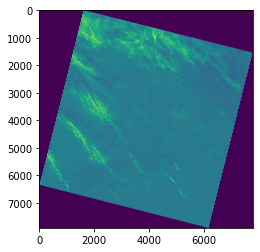

In [44]:
plt.imshow(b)

In [45]:
pca_components = 50 #reducing columns to 50 very low IK

pca_r = PCA(n_components = pca_components)
reduced_r = pca_r.fit_transform(r)


pca_g = PCA(n_components = pca_components)
reduced_g = pca_g.fit_transform(g)


pca_b = PCA(n_components = pca_components)
reduced_b = pca_b.fit_transform(b)

In [46]:
combined = np.array([reduced_r, reduced_g, reduced_b])

In [47]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [48]:
reconstructed_r.shape

(7911, 7781)

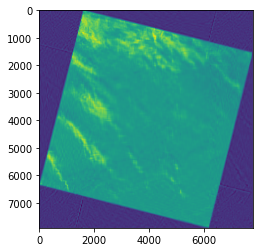

In [49]:
plt.imshow(reconstructed_r)

In [50]:
img_reconstructed = (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

In [ ]:
plt.imshow(img_reconstructed)